# Feature Engineering

Feature Engineering is the process of using domain knowledge of data to create features that make machine learning algorithms work better. Features are individual variables that are used as inputs to your model and can range from raw data to derived attributes.

This process can include:

  - Selection and transformation of variables.
  - Creation of new variables from the existing ones.
  - Cleaning and handling of missing values.
  - Dimensionality reduction.


    

## Feature Vectors vs. Embeddings

### Feature Vectors:
Feature vectors are fundamental in representing the properties of data points in a format that machine learning algorithms can process. Here's an extended look:

**Structure**: Feature vectors are structured arrays or lists where each entry represents a specific attribute or feature of the data point. For instance, in a dataset about cars, a feature vector might look like horsepower, weight, fuel efficiency.

**Quality and Selection**: The effectiveness of a feature vector largely depends on the quality and relevance of the features it includes. Feature engineering plays a crucial role here, as it involves selecting the most relevant features and possibly transforming them to better suit the machine learning model's needs.

**Application**: Feature vectors are used across various domains, from simple linear regression to complex neural networks. They serve as the foundational input for training and making predictions with models.

### Embeddings:
Embeddings take the concept of feature vectors further, especially when dealing with high-dimensional and complex data like text, images, or even graphs.

**Dimensionality Reduction**: Embeddings map high-dimensional input data into a lower-dimensional vector space. This reduction is beneficial because it simplifies the data while preserving the most important aspects of its structure or meaning. For example, Word2Vec creates low-dimensional vectors for words while maintaining their semantic relationships.

**Semantic Meaning**: One of the significant advantages of embeddings is their ability to capture semantic meaning. In natural language processing, words that are used in similar contexts will have similar embeddings, meaning they will be close to each other in the vector space.

**Training**: Embeddings are typically learned through models during the training process. For instance, neural networks learn embeddings for words or images as part of their training, optimizing the embeddings to improve the model's performance on the task at hand.

**Flexibility**: Embeddings can be transferred between tasks. Pre-trained embeddings from large datasets, like those from image recognition models or language models, can be fine-tuned for specific tasks, making them exceedingly powerful and versatile.

In summary:

**Feature Vectors**: General-purpose numerical representations of data points. They are explicitly constructed through feature engineering and are used as inputs for machine learning models.

**Embeddings**: Specialized feature vectors that represent data in a lower-dimensional space while preserving semantic relationships. They are typically learned during model training and are particularly useful for complex data types like text and images.


# Feature selection
Feature selection is a crucial step in the machine learning process that involves identifying the most relevant features (variables) in a dataset that contribute the most to the model's predictive power. Here's how feature selection works:

**Subset Selection**: The goal is to select a subset of the most significant features from the original set of features. This can be done using various techniques, broadly categorized into three types:

1. Filter Methods: These methods assess the relevance of features by looking at their statistical properties. Common techniques include:

Correlation: Analyzing the correlation between features and the target variable.

Chi-Square Test: Evaluating the independence of features and the target variable.

ANOVA (Analysis of Variance): Testing the significance of features in the context of categorical targets.

2. Wrapper Methods: These methods evaluate the usefulness of features using a machine learning model. They involve:

Forward Selection: Starting with no features, adding them one by one based on which ones improve the model the most.

Backward Elimination: Starting with all features and removing the least significant ones one by one.

Recursive Feature Elimination (RFE): Iteratively building models and discarding the least important features.

3. Embedded Methods: These methods perform feature selection as part of the model training process. Examples include:

Regularization Techniques: Such as Lasso (L1) regularization, which can zero out less important feature coefficients.

Decision Trees: Methods like Random Forests or Gradient Boosting, which can rank features by their importance in split decisions.

**Evaluation Metrics**: During the selection process, various metrics are used to evaluate the importance of features:

Accuracy: How well the feature set improves the model's accuracy.

Precision and Recall: Especially for classification tasks, to measure the balance between positive and negative samples.

AUC-ROC: Area Under the Curve - Receiver Operating Characteristic, for evaluating the trade-off between true positive and false positive rates.

Cross-Validation: To ensure the robustness of the feature selection process,
cross-validation techniques are commonly applied. This involves dividing the data into training and testing sets multiple times to validate that the selected features generalize well across different subsets of the data.


###  Domain Knowledge:
Understanding the domain of the data can greatly aid in feature selection. Experts can provide insight into which features are likely to be most relevant based on theoretical or empirical evidence.

Benefits of Feature Selection:

Model Performance: By reducing the number of features, you can improve the model's accuracy and reduce overfitting.
Training Time: With fewer features, model training becomes faster and more efficient.
Interpretability: Models with fewer features are easier to interpret and understand.


In [ ]:
# Chi-Square example

from sklearn.feature_selection import chi2, SelectKBest
import pandas as pd
import numpy as np

# Sample data (features X, target y)
# Features must be non-negative, such as counts or booleans
X = pd.DataFrame({
    'feature1': [10, 20, 5, 15, 25],
    'feature2': [1, 2, 0, 3, 1],
    'feature3': [50, 60, 40, 70, 80]
})
y = pd.Series([0, 1, 0, 1, 0]) # Binary target variable

# Compute chi-squared statistics and p-values
chi_scores, p_values = chi2(X, y)

print("Chi-squared scores:", chi_scores)
print("P-values:", p_values)

# Select top K features based on chi-squared scores
k = 2  # Number of features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

print(f"\nOriginal features: {X.columns.tolist()}")
print(f"Selected {k} features based on chi-squared:")
print(X.columns[selector.get_support()].tolist())
print("Transformed X (selected features):\n", X_new)

Chi-squared scores: [1.38888889 2.88095238 1.38888889]
P-values: [0.23859283 0.08963299 0.23859283]

Original features: ['feature1', 'feature2', 'feature3']
Selected 2 features based on chi-squared:
['feature2', 'feature3']
Transformed X (selected features):
 [[ 1 50]
 [ 2 60]
 [ 0 40]
 [ 3 70]
 [ 1 80]]


In [ ]:
from sklearn.datasets import load_iris

data = load_iris(return_X_y=True)
X=data[0]
y=data[1]

chi_scores, p_values = chi2(X, y)

print("Chi-squared scores:", chi_scores)
print("P-values:", p_values)



Chi-squared scores: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
P-values: [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


# Time series prediction

Time series prediction is a powerful technique in data science that involves forecasting future values based on previously observed values in a time-ordered series. Here's a detailed explanation of how time series prediction works in the context of data science:

**Definition**: A time series is a sequence of data points collected or recorded at specific time intervals. Examples of time series data include stock prices, weather data, sales figures, and more.

Steps in Time Series Prediction:

1. Data Collection:
Gather historical data points that are recorded over consistent time intervals (e.g., daily, monthly, yearly).

2. Data Preprocessing:
Handling Missing Values: Imputing or interpolating missing data points to ensure a complete dataset.

Smoothing: Reducing noise in the data to make patterns more apparent.
Scaling: Normalizing or standardizing data to bring all values into a similar range.

3. Exploratory Data Analysis (EDA):

Trend Analysis: Identifying long-term upward or downward movements in the data.

Seasonality: Detecting repeating patterns or cycles in the data that occur at regular intervals (e.g., hourly, daily, monthly).

Stationarity: Checking if the statistical properties of the series (mean, variance) are constant over time. If not, apply transformations to achieve stationarity.

4. Feature Engineering:

Lag Features: Creating features that represent past values of the series (e.g., temperature at the previous hour).

Rolling Statistics: Calculating moving averages, rolling means, and rolling standard deviations.

Datetime Features: Extracting information such as the day of the week, month, quarter, or holiday indicators.

5. Model Selection:

Classical Methods:

ARIMA (Auto-Regressive Integrated Moving Average): A versatile method that combines autoregression, differencing, and moving averages.

Exponential Smoothing: Methods like Holt-Winters that account for level, trend, and seasonality.

Machine Learning Methods:

Linear Regression: Using lag features and other engineered features to predict future values.

Decision Trees/Random Forests: Handling non-linear relationships in the data.

Gradient Boosting: Improving predictive performance through boosting techniques.

Deep Learning Methods:

Recurrent Neural Networks (RNNs): Especially LSTM (Long Short-Term Memory) networks that are designed to capture long-term dependencies.

Convolutional Neural Networks (CNNs): Although more common in image processing, they can also be used to detect patterns in time series data.

6. Model Training and Validation:

Split the dataset into training and testing sets.
Use cross-validation techniques specific to time series, such as rolling-window cross-validation, to ensure the model generalizes well.

Evaluation Metrics:

Mean Absolute Error (MAE): Measures the average magnitude of errors.
Root Mean Squared Error (RMSE): Emphasizes larger errors.
Mean Absolute Percentage Error (MAPE): Expresses accuracy as a percentage.
R-squared (Coefficient of Determination): Indicates how well the predictions fit the actual data.

7. Forecasting:
Generate future predictions using the trained model.
Consider confidence intervals to express the uncertainty of the forecasts.

8. Deployment and Monitoring:
Implement the model in a production environment.
Continuously monitor the model's performance and update it with new data to maintain accuracy.

Applications:

Finance: Stock price prediction, economic indicators forecasting.
Retail: Demand forecasting, inventory management.
Energy: Load forecasting, renewable energy generation prediction.
Healthcare: Patient monitoring, disease outbreak prediction.
Transportation: Traffic flow prediction, ridesharing demand forecasting.


## Decision Trees for Regression

Decision Trees are a type of model used for both classification and regression tasks. When used for regression, the goal is to predict a continuous output value based on input features. Here's how they work:

Tree Structure: A decision tree is composed of nodes (which represent features), branches (which represent decision rules), and leaves (which represent the output value).

Splitting: The tree splits the data at each node based on the feature that results in the greatest reduction of variance in the target variable. In regression trees, commonly used criteria for splitting include Mean Squared Error (MSE) or Mean Absolute Error (MAE).

Prediction: Once the tree is trained, predicting the output for a new data point involves traversing the tree from the root to a leaf, following the decision rules at each node. The value in the leaf is the predicted output.

**Advantages**:

Simple to understand and visualize.
Captures non-linear relationships.

**Disadvantages**:

Prone to overfitting, especially with deep trees.
Sensitive to small changes in the data.

### Random Forests for Regression

Random Forests are an ensemble learning method that builds multiple decision trees and merges their results to improve the robustness and accuracy of predictions. Here's how they work for regression:

Multiple Trees: A random forest consists of a large number of decision trees. Each tree is trained on a different subset of the data, obtained through bootstrapping (random sampling with replacement).

Random Features: When splitting nodes, each tree considers a random subset of features rather than all features. This introduces additional randomness and helps in making the trees less correlated.

Aggregation: For regression tasks, the final prediction is obtained by averaging the predictions of all the trees in the forest. This aggregation helps in reducing the variance of the predictions and combatting overfitting.

**Advantages**:

Higher accuracy due to ensemble nature.
More robust and less prone to overfitting than individual decision trees.
Handles large datasets and features effectively.

**Disadvantages**:

More complex and computationally intensive than a single decision tree.
Less interpretable than a single decision tree.

Steps for Regression with Decision Trees and Random Forests

Data Preparation:

Collect and preprocess the data, handling missing values and scaling features as needed.

1. Model Training:
For Decision Trees: Train a single decision tree on the dataset using criteria like MSE for splitting.

2. For Random Forests: Train multiple decision trees on different bootstrapped samples of the dataset, considering random subsets of features at each split.

3. Model Evaluation:
Use metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared to evaluate model performance.
Perform cross-validation to ensure the model generalizes well to new data.

4. Hyperparameter Tuning:
Adjust parameters such as the maximum depth of the tree (for Decision Trees) or the number of trees in the forest, and the maximum number of features considered at each split (for Random Forests).

5. Prediction:
Use the trained model to predict the continuous output values for new data points.


In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[4, 4]])


array([2.5])

## ARIMA (Auto-Regressive Integrated Moving Average)

ARIMA is a popular and flexible model for forecasting time series data. It combines three components:

Auto-Regressive (AR) Component:
Uses the dependency between an observation and a number of lagged observations (i.e., previous values).
Represented as AR(p), where p is the number of lag observations included in the model (the order of the autoregressive part).

Integrated (I) Component:
Involves differencing the data to make it stationary (i.e., to remove trends and seasonality if they exist).
Represented as I(d), where d is the number of times the data have had past values subtracted to make the data stationary (the degree of differencing).

Moving Average (MA) Component:
Uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Represented as MA(q), where q is the size of the moving average window (the order of the moving average part).

ARIMA(p,d,q) combines these three parts into a comprehensive model for time series forecasting. Here is a brief on how each parameter is used:

p: The number of lag observations included in the model (lags of the dependent variable).
d: The number of times that the raw observations are differenced.
q: The size of the moving average window (lags of the forecast errors).

## ARIMAX (Auto-Regressive Integrated Moving Average with Exogenous Variables)

ARIMAX extends the ARIMA model by incorporating exogenous variables, which are additional predictors that are not influenced by the time series but can affect the outcome. This makes ARIMAX particularly useful when external factors may influence the time series being forecasted.

Exogenous Variables (X):
These are independent variables that can help improve the model’s forecasting accuracy.
Such variables could include external factors like economic indicators, weather conditions, promotional activities, etc.

ARIMAX(p,d,q,X) incorporates the exogenous variables into the ARIMA model. Here's how the components are used:

p: The number of lag observations included in the model.
d: The number of times that the raw observations are differenced to achieve stationarity.
q: The size of the moving average window.
X: The exogenous variables included in the model to account for external influences.

**Steps to Use ARIMA/ARIMAX for Forecasting**

1. Data Preparation:
Ensure the time series data is stationary (mean, variance, and covariance are constant over time). Use differencing if necessary.
If using ARIMAX, gather and preprocess exogenous variables.

2. Model Identification:
Identify the parameters (p, d, q) for ARIMA using techniques like autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.
For ARIMAX, also identify relevant exogenous variables.

3. Model Estimation:
Fit the ARIMA/ARIMAX model to the training data.

4. Model Diagnostics:
Check residuals to ensure they resemble white noise (no autocorrelation).
Evaluate model performance using metrics like Mean Squared Error (MSE), Akaike Information Criterion (AIC), or Bayesian Information Criterion (BIC).

5. Forecasting:
Use the fitted model to forecast future values.
For ARIMAX, ensure the exogenous variable values are available for the forecast period.

Applications

Finance: Stock prices and economic indicators forecasting.
Retail: Sales forecasting with promotional activities as exogenous variables.
Healthcare: Predicting disease outbreak trends with weather conditions as exogenous variables.

[Video](https://www.youtube.com/watch?v=3UmyHed0iYE)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/time-series-practice-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'time-series-practice-dataset' dataset.
Path to dataset files: /kaggle/input/time-series-practice-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose

store = pd.read_csv(path+'/test.csv',
                       index_col ='Date',
                       parse_dates = True)

#store.head()

product=store[store['product']==1]
product=product[product['store']==1]
product.head()




,store,product,number_sold
Date,,,
2019-01-01,1,1,698
2019-01-02,1,1,690
2019-01-03,1,1,693
2019-01-04,1,1,722
2019-01-05,1,1,731


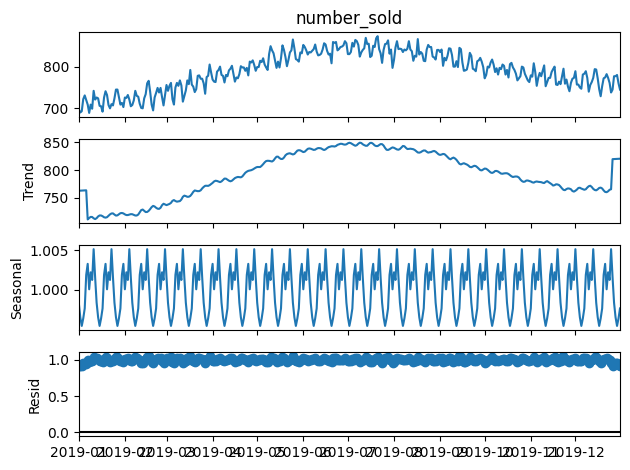

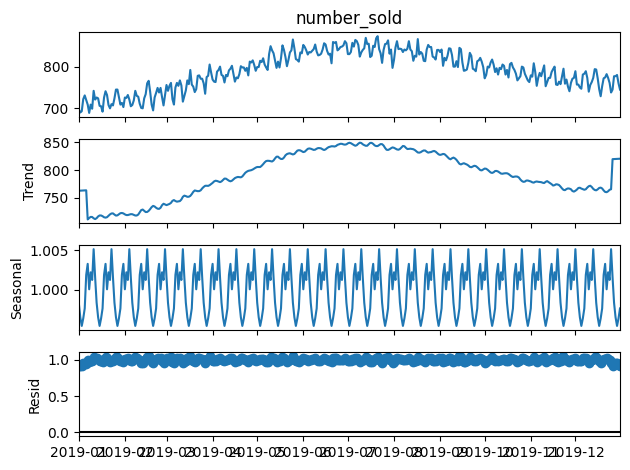

In [ ]:
result = seasonal_decompose(product['number_sold'],
                            model ='multiplicative',
                            period=12,extrapolate_trend=10000)

result.plot()


In [ ]:
from sklearn import tree
X = store[["product","store"]]
y = store["number_sold"]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict(store.iloc[800][["store","product"]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
store.iloc[800][["store","product"]]


,2019-03-12
store,0
product,2
